In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Danki_Tobias.helper.environment_definitions import cripple_options_evaluation, cripple_options_training

In [3]:
data_type_options = ['position', 'position_deltas', 'position_and_velocity', 'position_and_velocity_deltas']
train_on_options = ['non_crippled', 'multiple_envs']
algorithms = ['normal', 'meta', 'online_adaptation']
names = ['training_0', 'training_1', 'training_2', 'training_3', 'training_4', 'training_5',
         'eval_0', 'eval_1', 'eval_2', 'eval_3', 'eval_4', 'eval_5']

def read_average_reward(data_type, train_on, algorithm, name):
    file_name = f'../data/{data_type}/on_policy/trained_on_{train_on}/{algorithm}/evaluation_{name}.txt'
    with open(file_name, "r") as file:
        file.readline()
        file.readline()
        text = file.readline()
    _, average_reward = text.split("=")
    return float(average_reward)


def read_all_rewards():
    multi_index = pd.MultiIndex.from_product([data_type_options, train_on_options, algorithms, names],
                                             names=["data_type", "train_on", "algorithm", "name"])
    rewards = []
    for data_type in data_type_options:
        for train_on in train_on_options:
            for algorithm in algorithms:
                for name in names:
                    rewards.append(read_average_reward(data_type, train_on, algorithm, name))

    all_rewards = pd.Series(rewards, index=multi_index)
    return all_rewards

all_rewards = read_all_rewards()

This plot shows

<AxesSubplot:xlabel='name'>

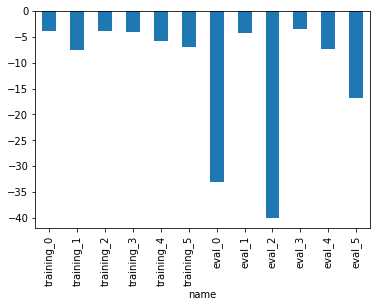

In [21]:
all_rewards['position_and_velocity_deltas', 'multiple_envs', 'normal', :].plot(kind='bar')

<AxesSubplot:xlabel='name'>

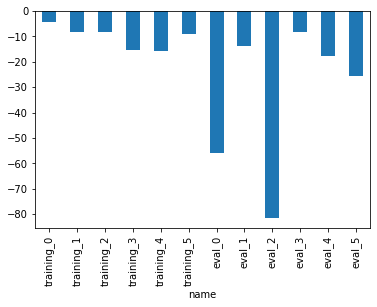

In [22]:
all_rewards['position', 'multiple_envs', 'normal', 'alle_training_envs'].plot(kind='bar')
all_rewards['position', 'non_crippled', 'normal', 'alle_training_envs'].plot(kind='bar')
